<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Energy_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA EXTRACTION

---

In [ ]:
energy = pd.read_csv("/content/drive/MyDrive/Raw_Data/Energy_consumption_dataset.csv")

In [ ]:
energy.head(2), energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


(   Month  Hour DayOfWeek Holiday  Temperature   Humidity  SquareFootage  \
 0      1     0  Saturday      No    25.139433  43.431581    1565.693999   
 1      1     1  Saturday      No    27.731651  54.225919    1411.064918   
 
    Occupancy HVACUsage LightingUsage  RenewableEnergy  EnergyConsumption  
 0          5        On           Off         2.774699          75.364373  
 1          1        On            On        21.831384          83.401855  ,
 None)

DATA PREPROCESSING

---

In [ ]:
float_col = energy.select_dtypes(include='float64').columns
for col in float_col:
  energy[col] = energy[col].round()

energy.head(2)

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.0,43.0,1566.0,5,On,Off,3.0,75.0
1,1,1,Saturday,No,28.0,54.0,1411.0,1,On,On,22.0,83.0


DATA ANALYSIS

---

In [ ]:
sns.set()

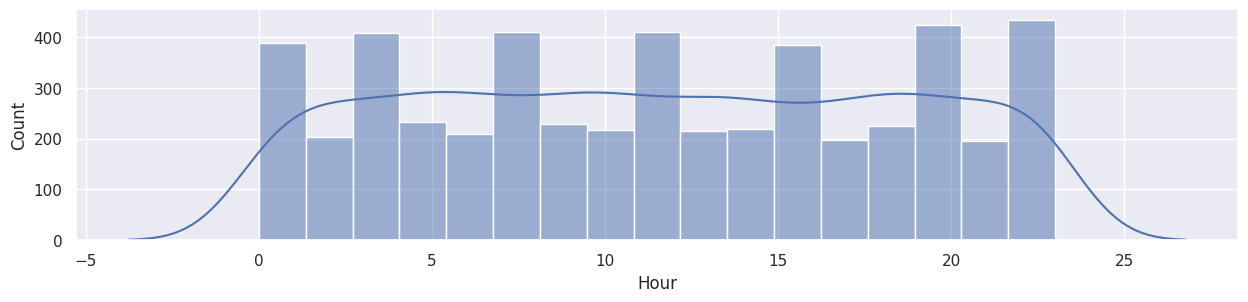

In [ ]:
plt.figure(figsize=(15,3))
sns.histplot(energy['Hour'], kde=True,
             kde_kws=dict(cut=3))
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

column_enc = energy.select_dtypes(include='object').columns

for col in column_enc:
  energy[col] = enc.fit_transform(energy[col])

In [ ]:
corr = energy.corr()

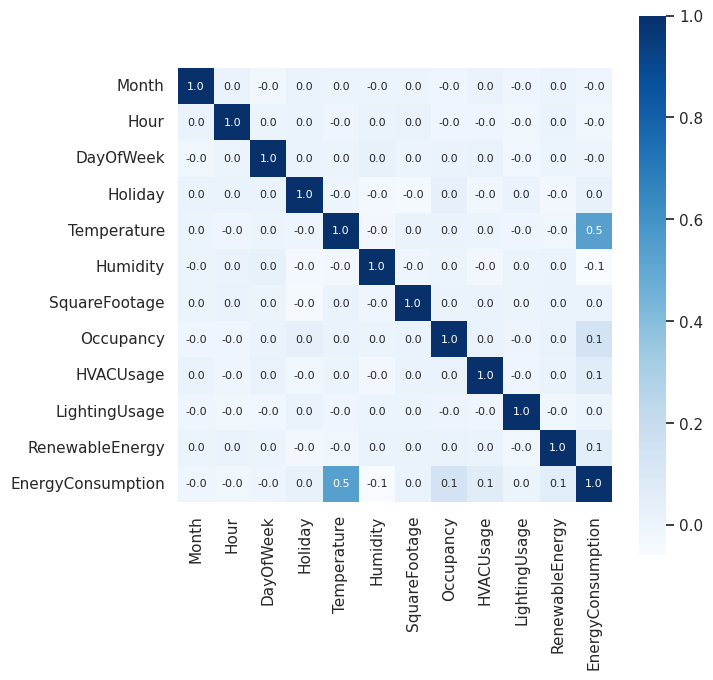

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(corr, fmt=".1f", cbar=True, square=True, annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

MACHINE LEARNING MODEL BUILDING

---

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
X = energy.drop(['EnergyConsumption'], axis=1)
y = energy['EnergyConsumption']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

---

In [ ]:
y_pred_train = rg.predict(X_train)
y_pred_test = rg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train accuracy score:{r2_train}")
print(f"Test accuracy score :{r2_test}")

feature = rg.feature_importances_
columns = X.columns
feature_importances = pd.DataFrame({'Feature': columns,
                                    'Importance': feature}).sort_values(by='Importance', ascending=False)

print(feature_importances)


Train accuracy score:0.902660655482304
Test accuracy score :0.23980132307268753
            Feature  Importance
4       Temperature    0.311570
6     SquareFootage    0.141435
10  RenewableEnergy    0.101601
5          Humidity    0.101182
1              Hour    0.091231
0             Month    0.072647
7         Occupancy    0.072409
2         DayOfWeek    0.053589
8         HVACUsage    0.018563
3           Holiday    0.017905
9     LightingUsage    0.017867
